DATA and libraries

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import requests
from io import StringIO
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


warnings.filterwarnings("ignore")

In [15]:
# Define the ticker symbol for S&P 500
ticker_symbol = "^GSPC"

# Fetch historical data for S&P 500 from Yahoo Finance starting from January 1970
sp500_data = yf.download(ticker_symbol, start="1970-01-01", end="2020-11-01", interval="1mo")

# Extract the 'Close' prices from the S&P 500 data
sp500_close_prices = sp500_data['Close']

# List of URLs for additional data
urls = [
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=INDPRO",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNEMPLOY",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CE16OV",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PAYNSA_PC1",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CIVPART",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=POPTHM",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=HOUST",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PERMIT",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CD6M",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=TB3MS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=BUSLOANS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MPRIME",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=LOANINV",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=M1REAL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=M2SL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=GS10",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CURRCIR",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PSAVERT",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PCE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DSPIC96",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PMSAVE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DEMDEPSL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=WTISPLC",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DAUTOSA"
]

# Fetch and merge additional data
for url in urls:
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.content.decode('utf-8')), index_col='DATE', parse_dates=True)
    data = data.loc['1970-01-01':'2020-11-01']
    sp500_close_prices = pd.merge(sp500_close_prices, data, left_index=True, right_index=True)

print(sp500_close_prices.head())


[*********************100%%**********************]  1 of 1 completed


                 Close  CPIAUCSL   INDPRO  UNRATE  UNEMPLOY  CE16OV  PAYNSA  \
1985-01-01  179.630005     105.7  54.5342     7.3      8423  106302   95049   
1985-02-01  181.179993     106.3  54.7019     7.2      8321  106555   95259   
1985-03-01  180.660004     106.8  54.7739     7.2      8339  106989   96055   
1985-04-01  179.830002     107.0  54.6662     7.3      8395  106936   96875   
1985-05-01  189.550003     107.2  54.7472     7.2      8302  106932   97726   

            CIVPART    POPTHM   HOUST  ...   GS10  FEDFUNDS  CURRCIR  PSAVERT  \
1985-01-01     64.7  237535.0  1711.0  ...  11.38      8.35  180.656     10.2   
1985-02-01     64.7  237667.0  1632.0  ...  11.51      8.50  178.242      8.9   
1985-03-01     64.9  237816.0  1800.0  ...  11.86      8.58  179.037      8.6   
1985-04-01     64.9  237987.0  1821.0  ...  11.43      8.27  180.854      9.8   
1985-05-01     64.8  238172.0  1680.0  ...  10.85      7.97  182.460     11.0   

               PCE  DSPIC96  PMSAVE  D

In [2]:
# Define the correct file path
file_path = r"C:\Users\piotr\OneDrive\Pulpit\RR_data_30Y_text_1row.xlsx"

# Load the data from the first sheet
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset to verify
print(dataset)

                    Date        SP500  SP500 RoR  Consumer Price Index  \
0    1970-01-01 00:00:00    90.310000  -0.008781                37.900   
1    1970-02-01 00:00:00    87.160000  -0.034880                38.100   
2             01.03.1970    88.650000   0.017095                38.300   
3             01.04.1970    85.950000  -0.030457                38.500   
4             01.05.1970    76.060000  -0.115067                38.600   
..                   ...          ...        ...                   ...   
607  2020-08-01 00:00:00  3391.710000   0.057392               259.366   
608  2020-09-01 00:00:00  3365.516667  -0.007723               259.951   
609  2020-10-01 00:00:00  3418.701364   0.015803               260.249   
610  2020-11-01 00:00:00  3548.992500   0.038111               260.895   
611  2020-12-01 00:00:00  3695.310000   0.041228               262.005   

     Industrial Production: Total Index  Unemployment Rate  \
0                                  3201          

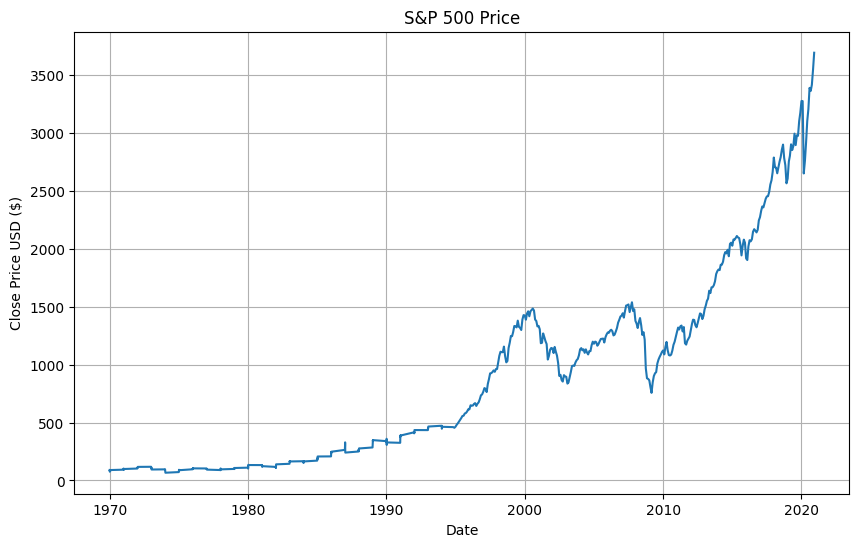

In [3]:
 # Load the data from the first sheet
file_path = r"C:\Users\piotr\OneDrive\Pulpit\RR_data_30Y_text_1row.xlsx"
dataset = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with missing or invalid dates
dataset = dataset.dropna(subset=['Date'])

# Plot the S&P 500 price
plt.figure(figsize=(10, 6))
plt.plot(dataset['Date'], dataset['SP500'], linestyle='-')
plt.title('S&P 500 Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.grid(True)
plt.show()

In [4]:
sp500_close_prices = dataset['SP500']

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_close_prices)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_close_prices, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_close_prices)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_close_prices)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test statistic: {adf_test_statistic}")
print(f"Critical value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test statistic: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test statistic: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test statistic: {za_test_statistic}")
print(f"P-value: {za_test_p_value}")
print("--------------------------------------------------")
print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test: Both tests indicate non-stationarity in the time series, as the test statistic exceeds the critical value at the 5% significance level.\nKPSS Test: Suggests strong evidence of non-stationarity, as the test statistic is significantly higher than the critical value at the 5% significance level.\nZivot-Andrews Test: Although the test statistic is negative, indicating some evidence of stationarity, the p-value is very high (close to 1), suggesting strong evidence against stationarity. ")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test statistic: 2.3101950596719973
Critical value (5%): -2.8664097967491498
--------------------------------------------------
Phillips-Perron Test:
Test statistic: 2.3101950596719973
Critical value (5%): -2.8664097967491498
--------------------------------------------------
KPSS Test:
Test statistic: 3.149565923832746
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test statistic: -1.2738193826799957
P-value: 0.9990000000000001
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test: Both tests indicate non-stationarity in the time series, as the test statistic exceeds the critical value at the 5% significance level.
KPSS Test: Suggests strong evidence of non-stationarity, as the test statistic is significantly higher than the critical value at the 5% significance level.
Zivot-Andrews Test: Although th

In [5]:
# Drop the first row containing NaN
sp500_diff_stat = dataset['SP500'].diff().dropna()

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_diff_stat)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_diff_stat, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_diff_stat)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_diff_stat)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test value: {adf_test_statistic}")
print(f"Test crit. Value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test value: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test value: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test value: {za_test_statistic}")
print(f"Test crit. Value (5%): {za_test_p_value}")
print("--------------------------------------------------")

print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. \nKPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.\nZivot-Andrews Test strongly supports stationarity in the time series, as its test statistic is highly negative and falls below the critical value at the 5% significance level.")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test value: -3.4636295993554445
Test crit. Value (5%): -2.8664097967491498
--------------------------------------------------
Phillips-Perron Test:
Test value: -3.4636295993554445
Critical value (5%): -2.8664097967491498
--------------------------------------------------
KPSS Test:
Test value: 0.8882909325208936
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test value: -4.761835034423216
Test crit. Value (5%): 0.059089972000741585
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. 
KPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.
Zivot-Andrews Test strongly supports stationarity in the time serie

In [6]:
# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with missing or invalid dates
dataset = dataset.dropna(subset=['Date'])

# Calculate the new dependent variable based on S&P 500 prices
dataset['SP500_diff'] = dataset['SP500'].diff()  # Calculate the difference between consecutive S&P 500 prices

# Drop the first row containing NaN value for the new dependent variable
dataset = dataset.dropna(subset=['SP500_diff'])

# Display the dataset with the new dependent variable
print(dataset)

          Date     SP500  SP500 RoR  Consumer Price Index  \
1   1970-02-01  0.002951  -0.034880                38.100   
2   1970-01-03  0.003001   0.017095                38.300   
3   1970-01-04  0.002910  -0.030457                38.500   
4   1970-01-05  0.002575  -0.115067                38.600   
5   1970-01-06  0.002559  -0.006179                38.800   
..         ...       ...        ...                   ...   
607 2020-08-01  0.114824   0.057392               259.366   
608 2020-09-01  0.113937  -0.007723               259.951   
609 2020-10-01  0.115737   0.015803               260.249   
610 2020-11-01  0.120148   0.038111               260.895   
611 2020-12-01  0.125102   0.041228               262.005   

     Industrial Production: Total Index  Unemployment Rate  \
1                                  3453                4.2   
2                                  3635                4.4   
3                                  3797                4.6   
4                  

In [7]:
# Drop the first row containing NaN
sp500_diff_stat = dataset['SP500'].diff().dropna()

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_diff_stat)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_diff_stat, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_diff_stat)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_diff_stat)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test value: {adf_test_statistic}")
print(f"Test crit. Value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test value: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test value: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test value: {za_test_statistic}")
print(f"Test crit. Value (5%): {za_test_p_value}")
print("--------------------------------------------------")

print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. \nKPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.\nZivot-Andrews Test strongly supports stationarity in the time series, as its test statistic is highly negative and falls below the critical value at the 5% significance level.")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test value: -3.462226335862347
Test crit. Value (5%): -2.866418015869717
--------------------------------------------------
Phillips-Perron Test:
Test value: -3.462226335862347
Critical value (5%): -2.866418015869717
--------------------------------------------------
KPSS Test:
Test value: 0.8846453197223656
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test value: -4.757767552400836
Test crit. Value (5%): 0.059847079070650795
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. 
KPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.
Zivot-Andrews Test strongly supports stationarity in the time series, a

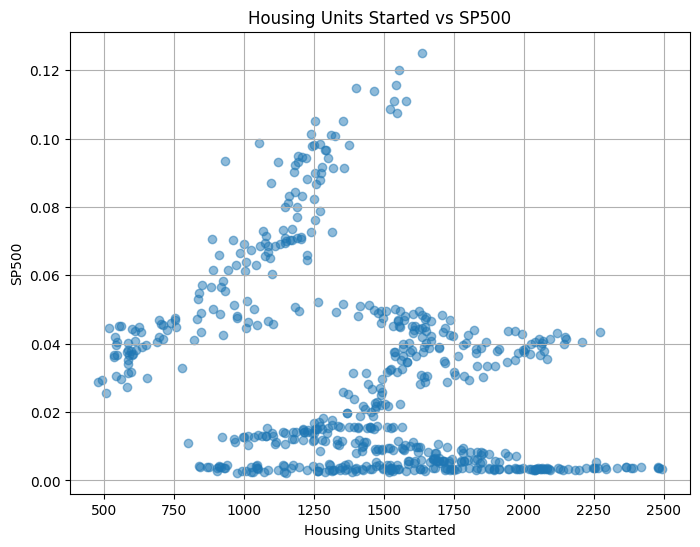

In [8]:
# Plot SP500 against Housing Units Started
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Housing Units Started'], dataset['SP500'], alpha=0.5)
plt.title('Housing Units Started vs SP500')
plt.xlabel('Housing Units Started')
plt.ylabel('SP500')
plt.grid(True)
plt.show()

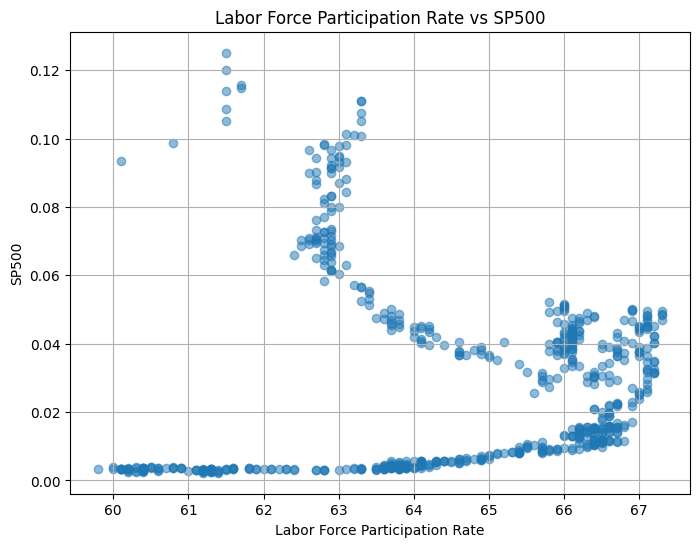

In [9]:
# Plot SP500 against Labor Force Participation Rate
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Labor Force Participation Rate'], dataset['SP500'], alpha=0.5)
plt.title('Labor Force Participation Rate vs SP500')
plt.xlabel('Labor Force Participation Rate')
plt.ylabel('SP500')
plt.grid(True)
plt.show()

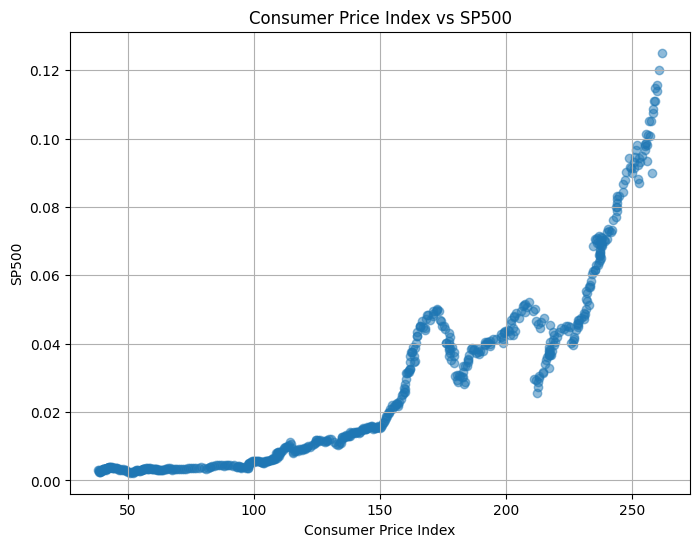

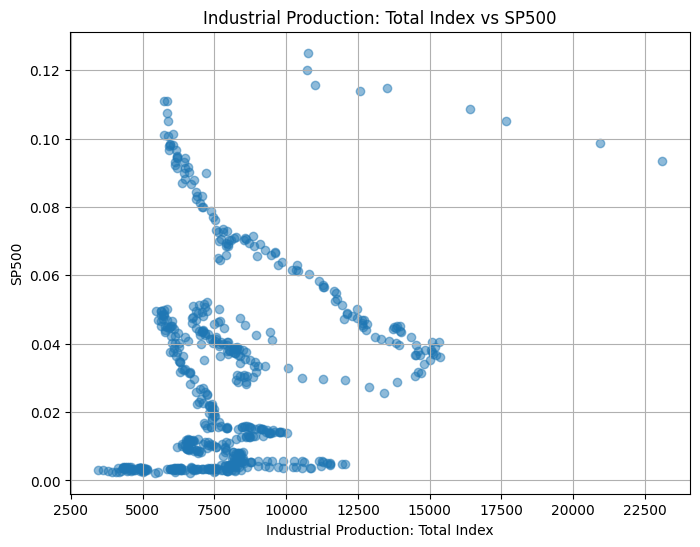

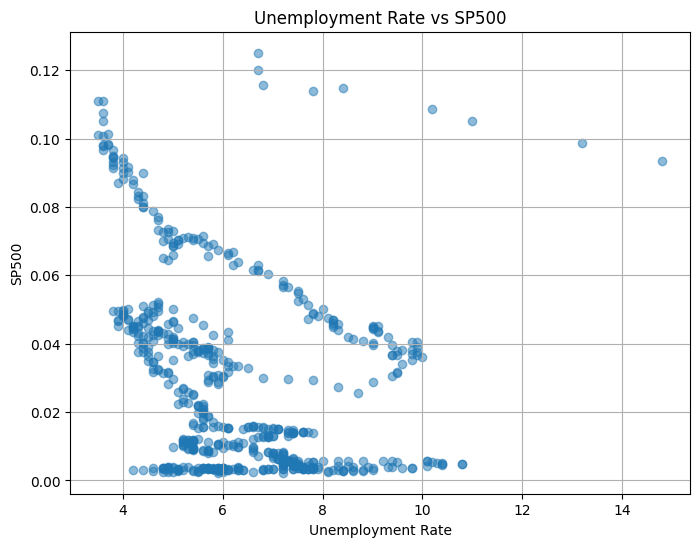

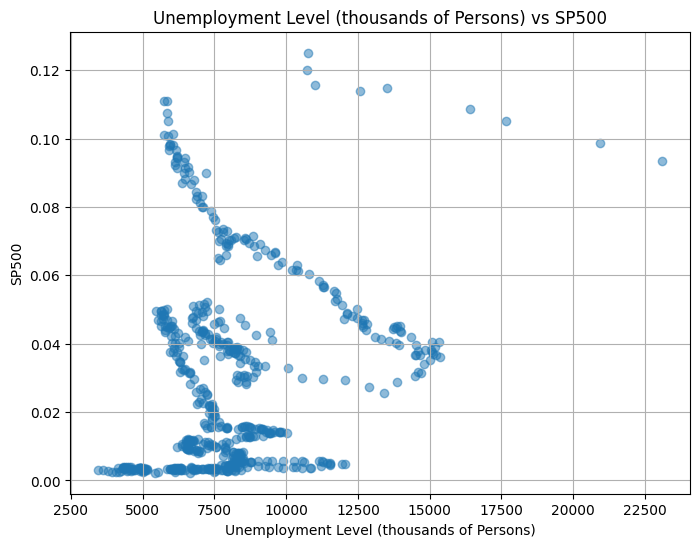

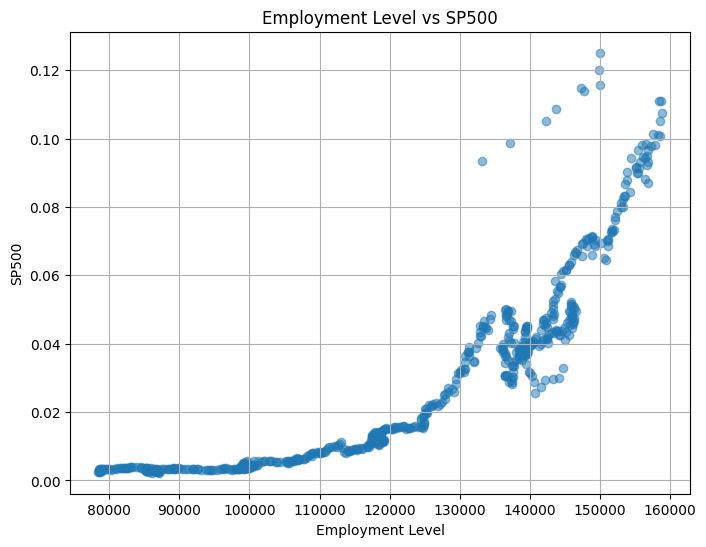

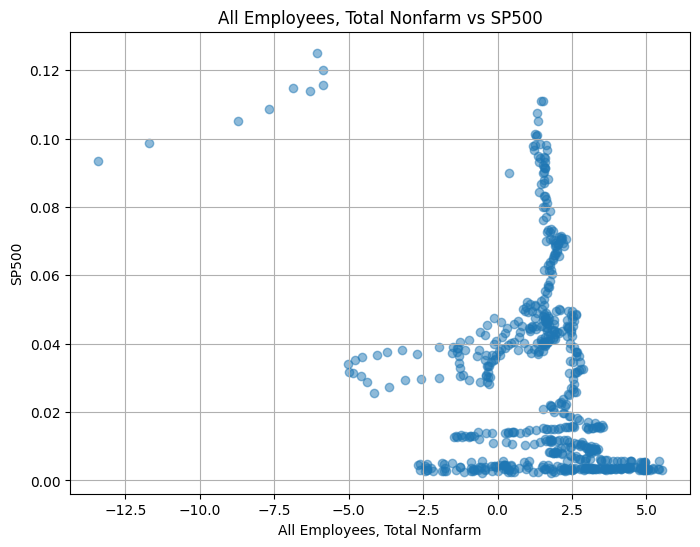

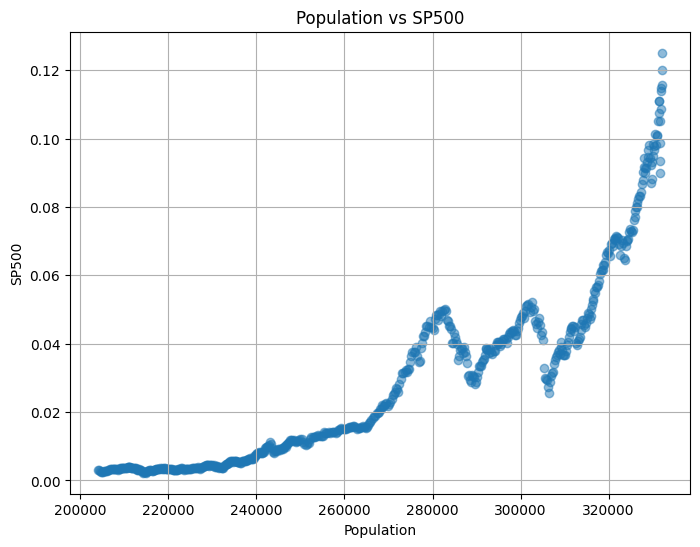

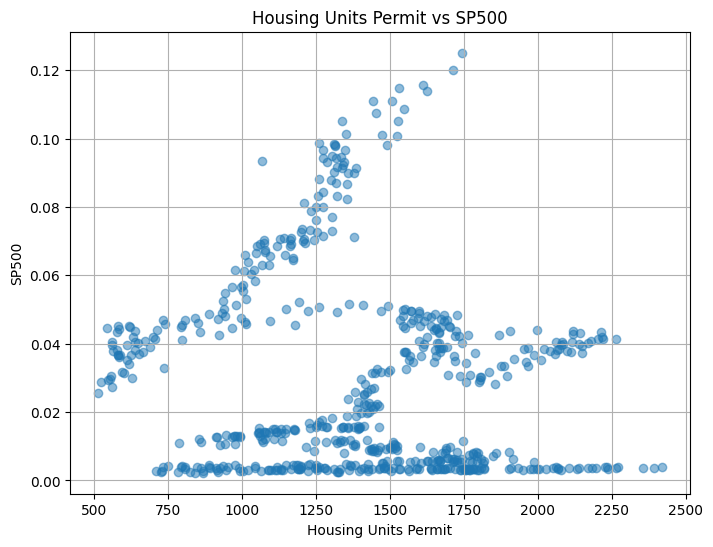

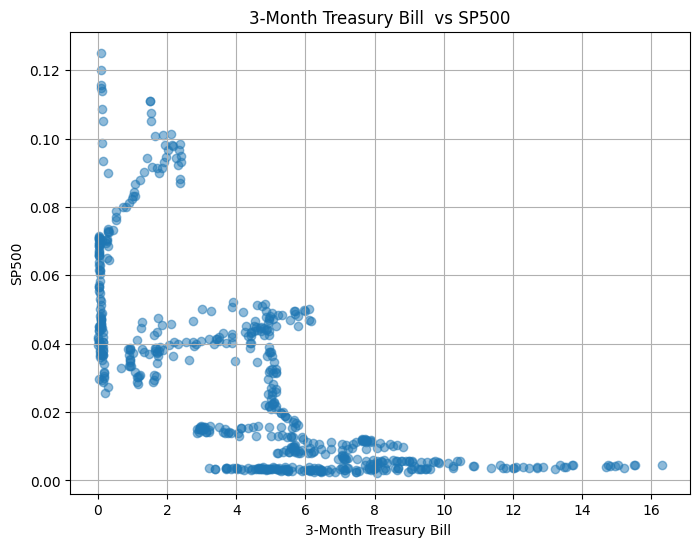

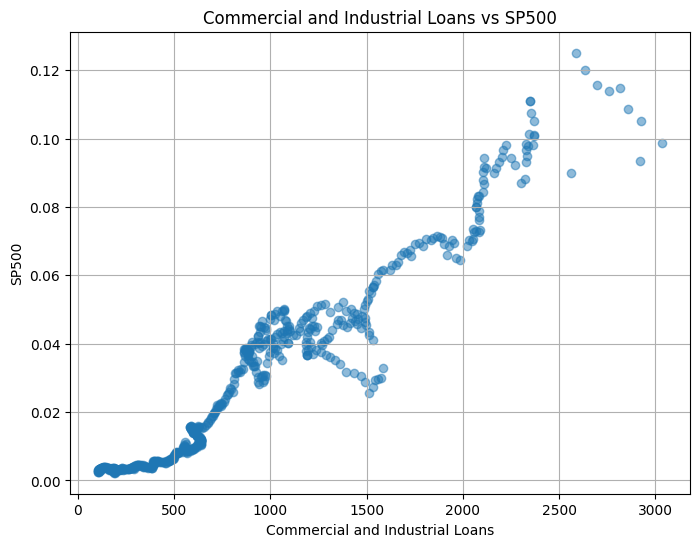

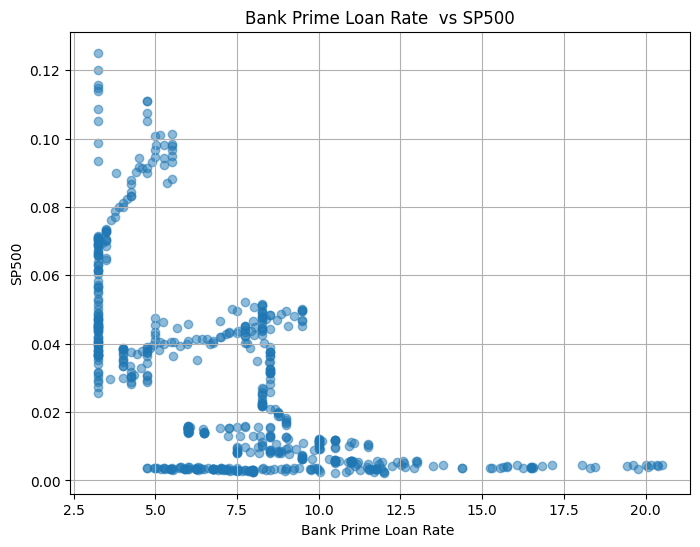

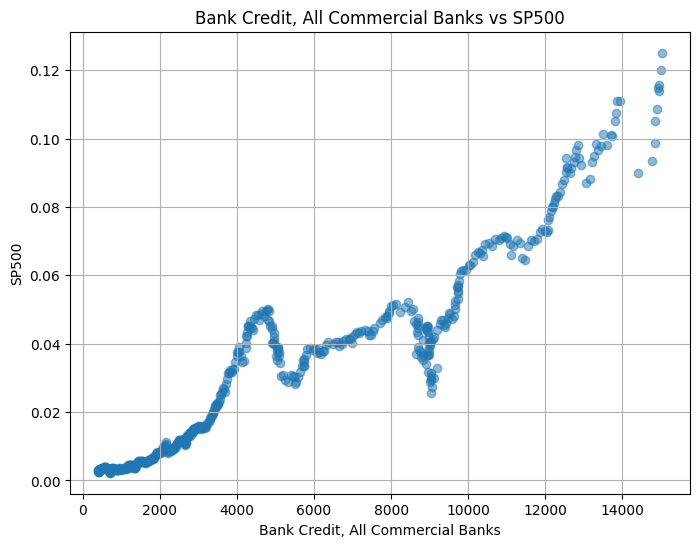

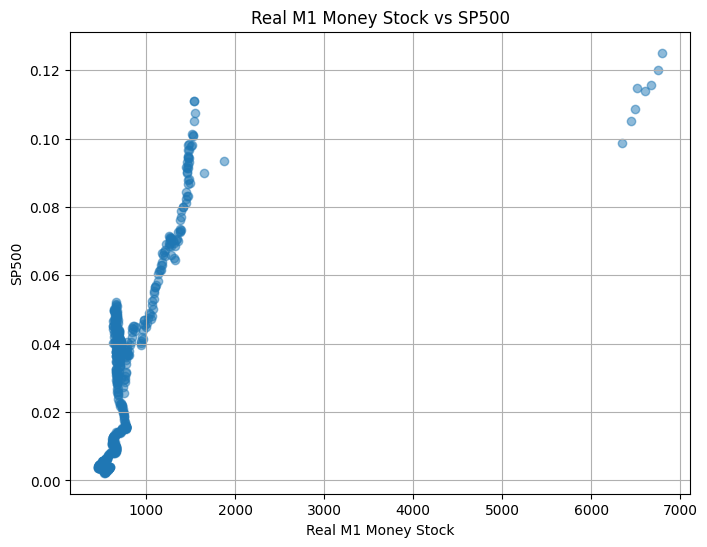

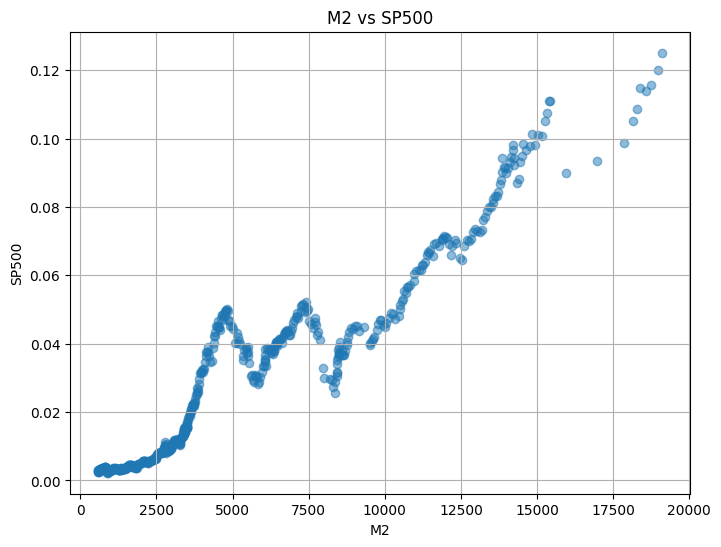

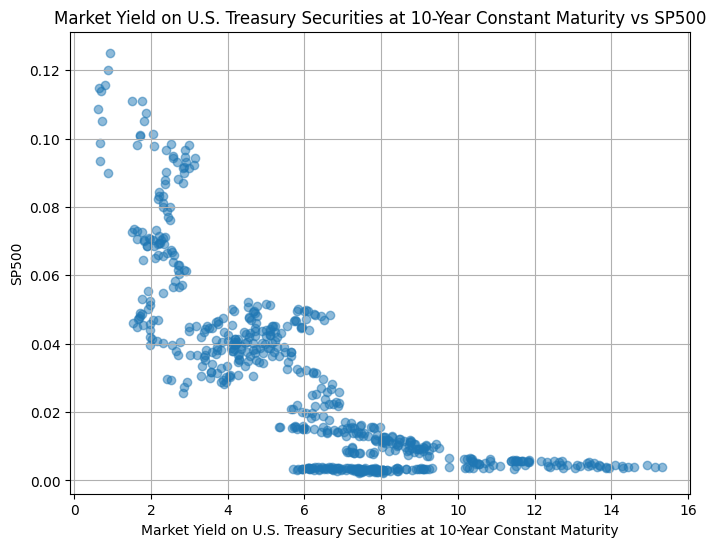

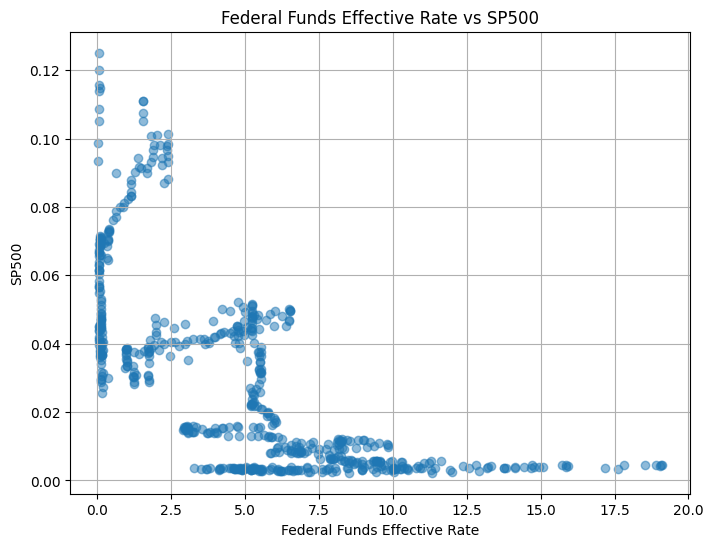

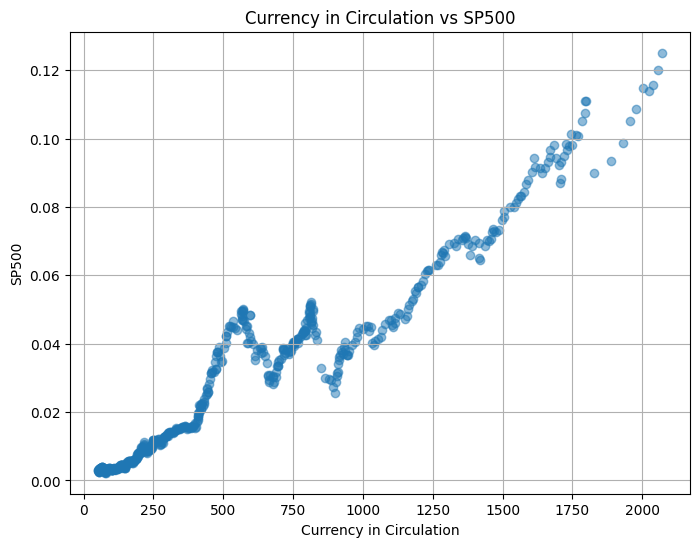

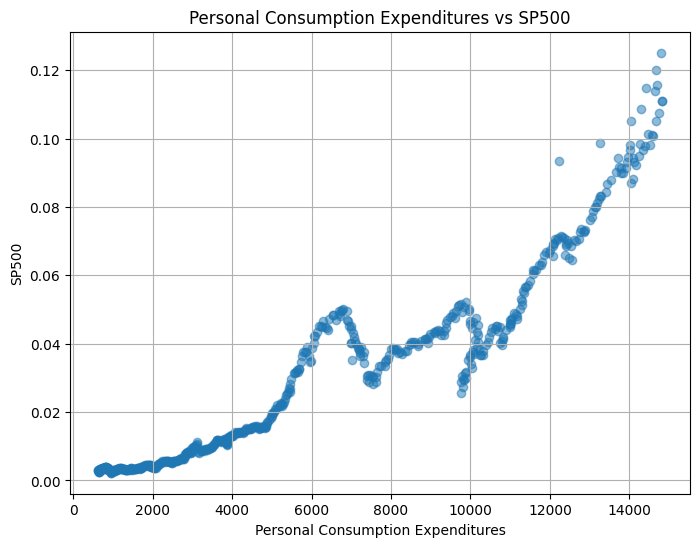

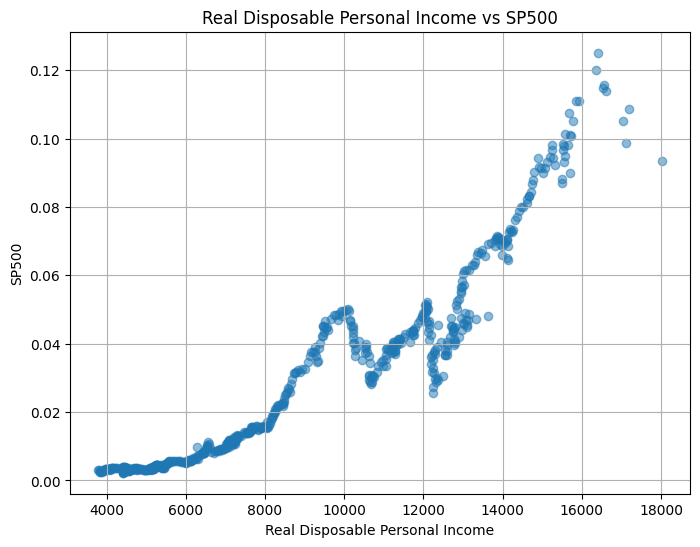

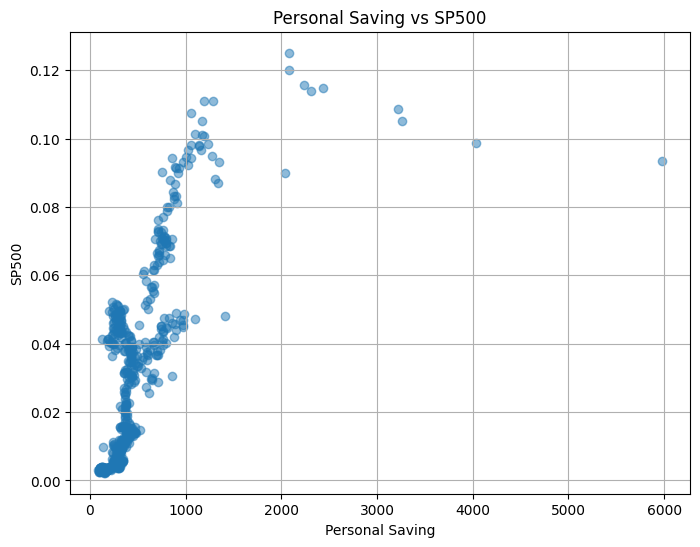

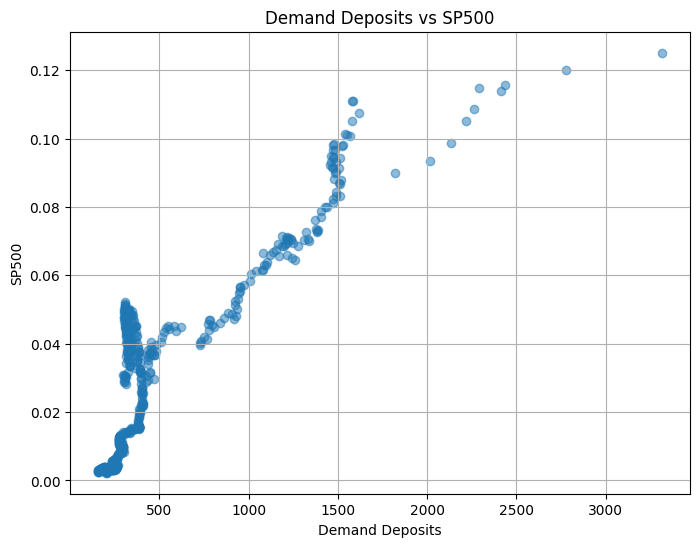

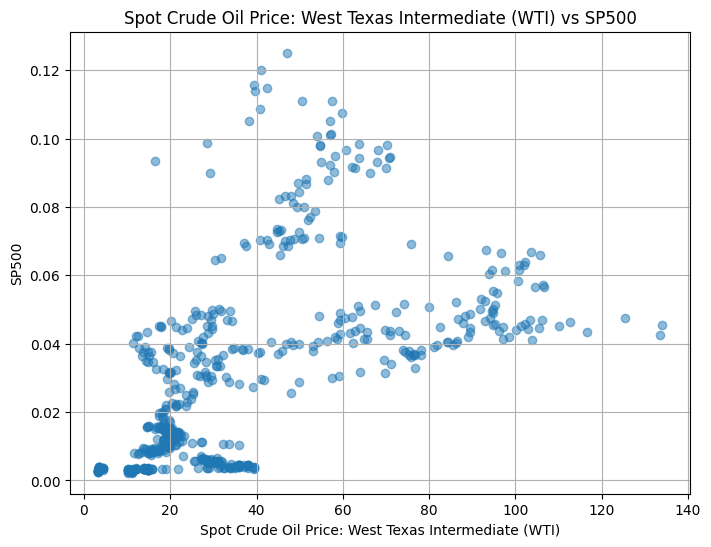

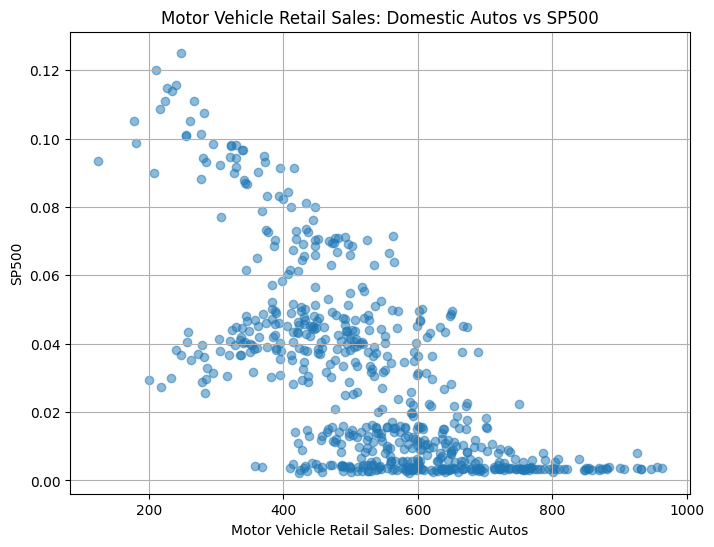

In [10]:
# List of features to plot against SP500
features_to_plot = [
    'Consumer Price Index', 
    'Industrial Production: Total Index',
    'Unemployment Rate', 
    'Unemployment Level (thousands of Persons)',
    'Employment Level', 
    'All Employees, Total Nonfarm',
    'Population',
    'Housing Units Permit',
    '3-Month Treasury Bill ', 
    'Commercial and Industrial Loans',
    'Bank Prime Loan Rate ', 
    'Bank Credit, All Commercial Banks',
    'Real M1 Money Stock', 
    'M2',
    'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity',
    'Federal Funds Effective Rate', 
    'Currency in Circulation',
    'Personal Consumption Expenditures',
    'Real Disposable Personal Income', 
    'Personal Saving', 
    'Demand Deposits',
    'Spot Crude Oil Price: West Texas Intermediate (WTI)',
    'Motor Vehicle Retail Sales: Domestic Autos'
]

# Plot each feature against SP500
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[feature], dataset['SP500'], alpha=0.5)
    plt.title(f'{feature} vs SP500')
    plt.xlabel(feature)
    plt.ylabel('SP500')
    plt.grid(True)
    plt.show()


In [11]:
independent_vars = [
    'Employment Level',
    '3-Month Treasury Bill ',
    'Consumer Price Index',
    'Real M1 Money Stock',
    'All Employees, Total Nonfarm',
    'Industrial Production: Total Index',
    'Personal Consumption Expenditures',
    'Commercial and Industrial Loans',
    'Real Disposable Personal Income',
    'Currency in Circulation',
    'Spot Crude Oil Price: West Texas Intermediate (WTI)',
    'Bank Credit, All Commercial Banks',
    'Personal Saving',
    'Demand Deposits',
    'M2',
    'Population',
    
    
]

# Create a DataFrame containing only the independent variables
X = dataset[independent_vars]

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

                                             Variable           VIF
0                                    Employment Level  16976.865135
1                              3-Month Treasury Bill      16.569182
2                                Consumer Price Index   9497.586805
3                                 Real M1 Money Stock     15.264317
4                        All Employees, Total Nonfarm      3.791283
5                  Industrial Production: Total Index    203.557605
6                   Personal Consumption Expenditures  37219.331958
7                     Commercial and Industrial Loans    346.334525
8                     Real Disposable Personal Income  21756.284752
9                             Currency in Circulation   3863.335550
10  Spot Crude Oil Price: West Texas Intermediate ...     33.609801
11                  Bank Credit, All Commercial Banks   3061.720175
12                                    Personal Saving    157.191171
13                                    Demand Dep

In [12]:
# Create a DataFrame containing only the independent variables
X = dataset[independent_vars]

# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Iteratively drop variables with VIF > 5 until all VIF values are less than 5
while True:
    vif_data = calculate_vif(X)
    max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax()]
    if max_vif_variable['VIF'] <= 5:
        break
    else:
        print(f"Removing variable '{max_vif_variable['Variable']}' with VIF {max_vif_variable['VIF']}")
        X = X.drop(columns=[max_vif_variable['Variable']])

# Print the final VIF values
print("\nFinal VIF Test Results after Variables Dropping")
print(vif_data)

Removing variable 'Personal Consumption Expenditures' with VIF 37219.33195824601
Removing variable 'Employment Level' with VIF 10680.419029561886
Removing variable 'Real Disposable Personal Income' with VIF 5559.8726073100415
Removing variable 'M2' with VIF 1817.3680901953212
Removing variable 'Bank Credit, All Commercial Banks' with VIF 690.8161298305932
Removing variable 'Currency in Circulation' with VIF 188.91778709616818
Removing variable 'Consumer Price Index' with VIF 154.0136386999429
Removing variable 'Population' with VIF 88.28508038749858
Removing variable 'Commercial and Industrial Loans' with VIF 22.518404106425198
Removing variable 'Demand Deposits' with VIF 13.436558754458648
Removing variable 'Industrial Production: Total Index' with VIF 10.862693766405068
Removing variable 'Personal Saving' with VIF 6.0195650672478145

Final VIF Test Results after Variables Dropping
                                            Variable       VIF
0                             3-Month Tre

In [13]:
# Select the independent variables/features
independent_vars = [
    '3-Month Treasury Bill ',
    'Real M1 Money Stock',
    'All Employees, Total Nonfarm',
    'Spot Crude Oil Price: West Texas Intermediate (WTI)'
]

# Extract the independent variables and the dependent variable from the dataset
X = dataset[independent_vars]
y = dataset['SP500']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the standardized data
model.fit(X_scaled, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate R-squared
r_squared = model.score(X_scaled, y)
print("R-squared:", r_squared)

# Make predictions
y_pred = model.predict(X_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Add a constant term to the independent variables matrix
X_scaled_with_constant = sm.add_constant(X_scaled)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y, X_scaled_with_constant).fit()

# Print the summary of the regression results
print(ols_model.summary())


Coefficients: [-0.00971744  0.01363633  0.00329362  0.00939493]
Intercept: 0.029379881063644468
R-squared: 0.7195722097371111
Mean Squared Error: 0.0002169020625919327
                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     388.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          1.07e-165
Time:                        10:27:30   Log-Likelihood:                 1710.2
No. Observations:                 611   AIC:                            -3410.
Df Residuals:                     606   BIC:                            -3388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          